# I. Generate all lattice walks, 2D square lattice

In [1]:
# This I showed in class:

steps = [(1, 0), (-1, 0), (0, 1), (0, -1)]

def generate_walks(path, L):
    """Generate all random walks on the 2D square lattice."""
    if L == 0:
        print(path)
    else:
        for dx, dy in steps:
            x, y = path[-1]
            pp = path.copy()
            pp.append((x + dx, y + dy))
            generate_walks(pp, L - 1)

In [2]:
generate_walks([(0, 0)], 2)

[(0, 0), (1, 0), (2, 0)]
[(0, 0), (1, 0), (0, 0)]
[(0, 0), (1, 0), (1, 1)]
[(0, 0), (1, 0), (1, -1)]
[(0, 0), (-1, 0), (0, 0)]
[(0, 0), (-1, 0), (-2, 0)]
[(0, 0), (-1, 0), (-1, 1)]
[(0, 0), (-1, 0), (-1, -1)]
[(0, 0), (0, 1), (1, 1)]
[(0, 0), (0, 1), (-1, 1)]
[(0, 0), (0, 1), (0, 2)]
[(0, 0), (0, 1), (0, 0)]
[(0, 0), (0, -1), (1, -1)]
[(0, 0), (0, -1), (-1, -1)]
[(0, 0), (0, -1), (0, 0)]
[(0, 0), (0, -1), (0, -2)]


## Store the walks

Printing walks is nice, but not very useful. Better construct a list of all walks, for postprocessing. To this end, add a `cache` parameter, which stores all generated walks.

In [3]:
steps = [(1, 0), (-1, 0), (0, 1), (0, -1)]

def generate_walks_stored(path, L, cache):
    if L == 0:
        cache.append(path)
    else:
        for dx, dy in steps:
            x, y = path[-1]
            xy_new = (x + dx, y + dy)
            pp = path.copy()
            pp.append(xy_new)
            generate_walks_stored(pp, L - 1, cache)

In [4]:
cache = []
generate_walks_stored([(0, 0)], 2, cache)
len(cache)

16

In [5]:
cache

[[(0, 0), (1, 0), (2, 0)],
 [(0, 0), (1, 0), (0, 0)],
 [(0, 0), (1, 0), (1, 1)],
 [(0, 0), (1, 0), (1, -1)],
 [(0, 0), (-1, 0), (0, 0)],
 [(0, 0), (-1, 0), (-2, 0)],
 [(0, 0), (-1, 0), (-1, 1)],
 [(0, 0), (-1, 0), (-1, -1)],
 [(0, 0), (0, 1), (1, 1)],
 [(0, 0), (0, 1), (-1, 1)],
 [(0, 0), (0, 1), (0, 2)],
 [(0, 0), (0, 1), (0, 0)],
 [(0, 0), (0, -1), (1, -1)],
 [(0, 0), (0, -1), (-1, -1)],
 [(0, 0), (0, -1), (0, 0)],
 [(0, 0), (0, -1), (0, -2)]]

## Task 0

Compute the average end-to-end distance of random walks of a given length. What is the scaling of the end-to-end distance with the length of the walk? What is the scaling of the mean *square* end-to-end distance with the length?

<font color='red'> (See in the papers, prove) </font>

In [6]:
def task0(L):
    paths=list()
    generate_walks_stored([(0, 0)], L, paths)

    average_distance=0
    for one_path in paths:
        average_distance+=((one_path[0][0]-one_path[-1][0])**2+(one_path[0][0]-one_path[-1][1])**2)**0.5

    return average_distance/len(paths)
print(task0(2))

1.2071067811865477


In [10]:
import numpy as np

n=10
distances=np.zeros(n)
for i in range(10):
    distances[i]=task0(i)

Text(0,0.5,'end-to-end distance')

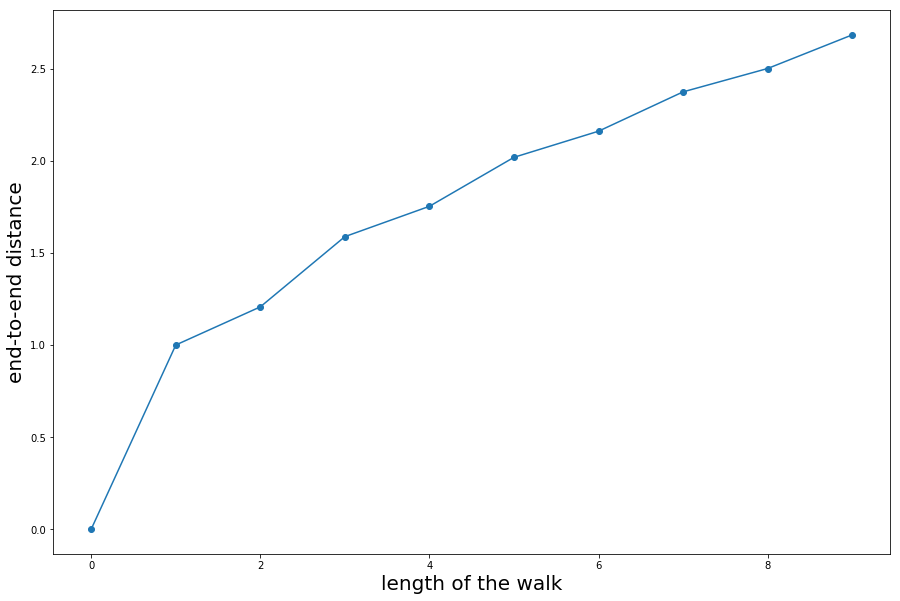

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.plot(distances, 'o-')
ax.set_xlabel('length of the walk', fontsize=20)
ax.set_ylabel('end-to-end distance', fontsize=20)

In [7]:
#The mean square end-to-end distance of walks of the length 12
def mean_square(L):
    paths=list()
    generate_walks_stored([(0, 0)], L, paths)

    ms=0
    for one_path in paths:
        ms+=(one_path[0][0]-one_path[-1][0])**2+(one_path[0][0]-one_path[-1][1])**2

    return ms/len(paths)
print(mean_square(12))

12.0


# I. Generate all SAWs on a 2D square lattice

A self-avoiding walk is a random walk where a lattice site can only be visited once.

In [16]:
steps = [(1, 0), (-1, 0), (0, 1), (0, -1)]

def generate_SAWs(path, L, cache):
    if L == 0:
        cache.append(path)
    else:
        for dx, dy in steps:
            x, y = path[-1]
            xy_new = (x + dx, y + dy)
            if xy_new in path:
                continue
            pp = path.copy()
            pp.append(xy_new)
            generate_SAWs(pp, L - 1, cache)

## Task 1

How many walks of a given length are there? What is the mean end-to-end distance of walks of a given length? What is mean *square* of the end-to-end distance?

In [17]:
cache=list()
generate_SAWs([(0, 0)], 2, cache)
len(cache)

12

<font color='red'> (See in the papers, prove) </font>

In [20]:
def mean_distance1(L):
    paths=list()
    generate_SAWs([(0, 0)], L, paths)

    average_distance=0
    for one_path in paths:
        average_distance+=((one_path[0][0]-one_path[-1][0])**2+(one_path[0][0]-one_path[-1][1])**2)**0.5

    return average_distance/len(paths)
print(mean_distance1(2))

1.6094757082487303


In [21]:
#The mean square end-to-end distance of SAWs of the length 12
def mean_square1(L):
    paths=list()
    generate_SAWs([(0, 0)], L, paths)

    ms=0
    for one_path in paths:
        ms+=(one_path[0][0]-one_path[-1][0])**2+(one_path[0][0]-one_path[-1][1])**2

    return ms/len(paths)
print(mean_square1(12))

34.186992970836975


## Extra tasks (for fun, no credit, a possible basis of a course project)

1. Generate a self-avoiding walk on triangular lattice <font color='red'> (a link or a hint) </font>.
2. Rewrite the recursive algorithm to use a queue <font color='red'> (a link or a hint) </font>.